In [1]:
#Getting the sentimental analysis of the customer on social media post and all 

In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
reviews_df= pd.read_csv('amazon_alexa.tsv', sep='\t')

In [9]:
reviews_df


,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [19]:
reviews_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3149 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [21]:
reviews_df.describe()


,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [23]:
reviews_df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [25]:
reviews_df['verified_reviews']

0                                           Love my Echo!
1                                               Loved it!
2       Sometimes while playing a game, you can answer...
3       I have had a lot of fun with this thing. My 4 ...
4                                                   Music
                              ...                        
3145    Perfect for kids, adults and everyone in betwe...
3146    Listening to music, searching locations, check...
3147    I do love these things, i have them running my...
3148    Only complaint I have is that the sound qualit...
3149                                                 Good
Name: verified_reviews, Length: 3150, dtype: object

<Axes: >

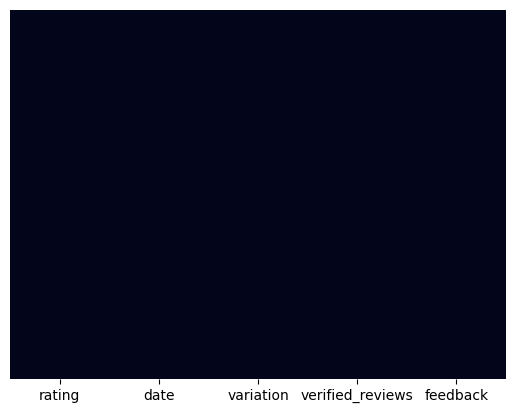

In [27]:
sns.heatmap(reviews_df.isnull(), yticklabels=False,cbar=False)

array([[<Axes: title={'center': 'rating'}>,
        <Axes: title={'center': 'feedback'}>]], dtype=object)

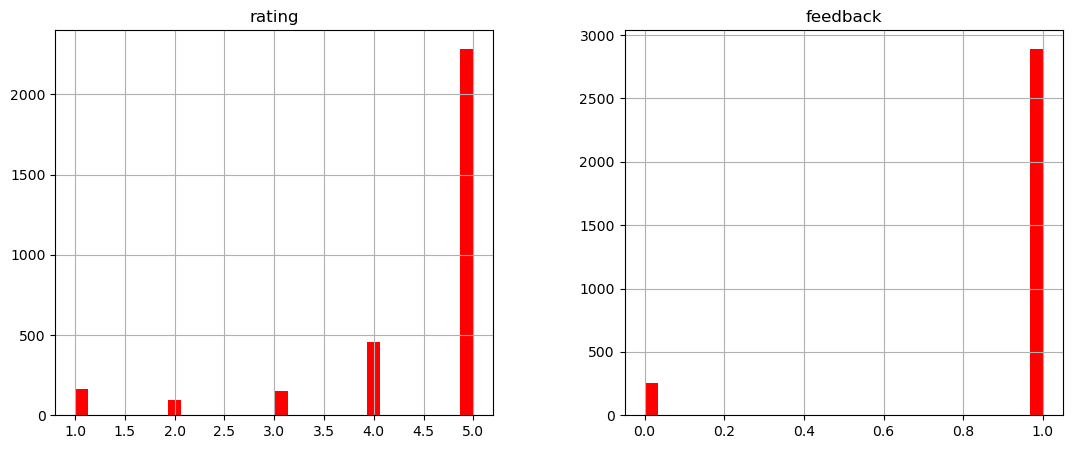

In [29]:
reviews_df.hist(bins=30, figsize=(13,5), color='r')

In [35]:
reviews_df['length']=reviews_df['verified_reviews'].apply(lambda x: len(x) if isinstance(x,str) else 0)

In [37]:
reviews_df.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


<Axes: ylabel='Frequency'>

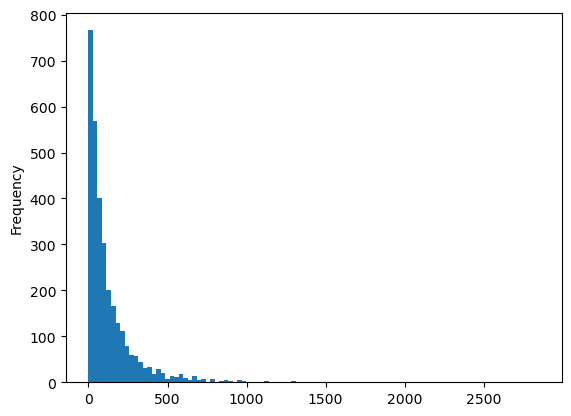

In [39]:
reviews_df['length'].plot(bins=100, kind='hist')

In [41]:
reviews_df.describe()

,rating,feedback,length
count,3150.000000,3150.000000,3150.000000
mean,4.463175,0.918413,132.048254
std,1.068506,0.273778,182.100859
min,1.000000,0.000000,0.000000
25%,4.000000,1.000000,30.000000
50%,5.000000,1.000000,74.000000
75%,5.000000,1.000000,165.000000
max,5.000000,1.000000,2851.000000


In [53]:
reviews_df[reviews_df['length']==0]

,rating,date,variation,verified_reviews,feedback,length
473,2,29-Jun-18,White,NaN,0,0


In [49]:
reviews_df[reviews_df['length']==2851]

,rating,date,variation,verified_reviews,feedback,length
2016,5,20-Jul-18,Black Plus,Incredible piece of technology.I have this rig...,1,2851


In [59]:
positive=reviews_df[reviews_df['feedback']==1]
positive

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5
...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,135
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,441
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,380


In [61]:
negative=reviews_df[reviews_df['feedback']==0]
negative

,rating,date,variation,verified_reviews,feedback,length
46,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0,163
111,2,30-Jul-18,Charcoal Fabric,Sound is terrible if u want good music too get...,0,53
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0,18
162,1,30-Jul-18,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0,87
176,2,30-Jul-18,Heather Gray Fabric,Sad joke. Worthless.,0,20
...,...,...,...,...,...,...
3047,1,30-Jul-18,Black Dot,Echo Dot responds to us when we aren't even ta...,0,120
3048,1,30-Jul-18,White Dot,NOT CONNECTED TO MY PHONE PLAYLIST :(,0,37
3067,2,30-Jul-18,Black Dot,The only negative we have on this product is t...,0,240
3091,1,30-Jul-18,Black Dot,I didn’t order it,0,17


<Axes: xlabel='feedback', ylabel='count'>

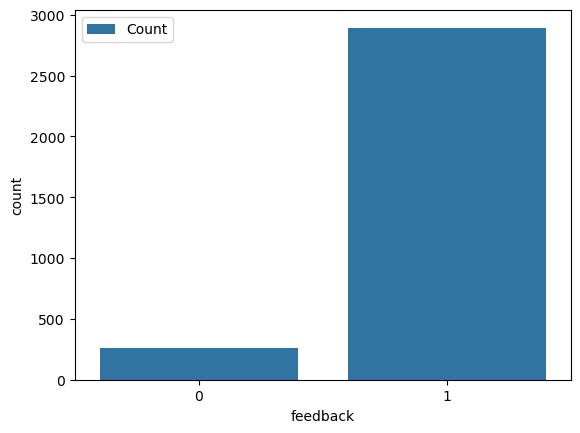

In [65]:
sns.countplot(x='feedback', data= reviews_df, label='Count')

<Axes: xlabel='rating', ylabel='count'>

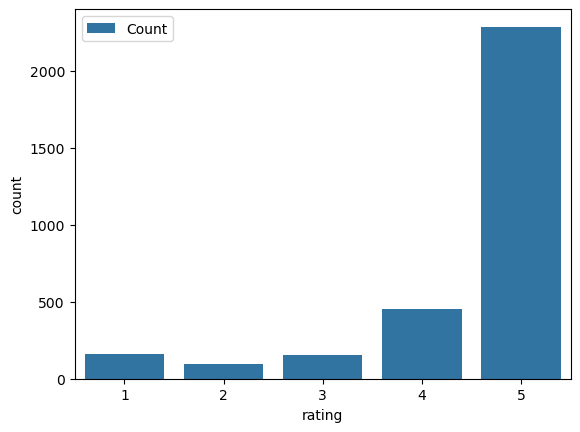

In [67]:
sns.countplot(x='rating',data=reviews_df, label='Count' )

<Axes: xlabel='variation', ylabel='rating'>

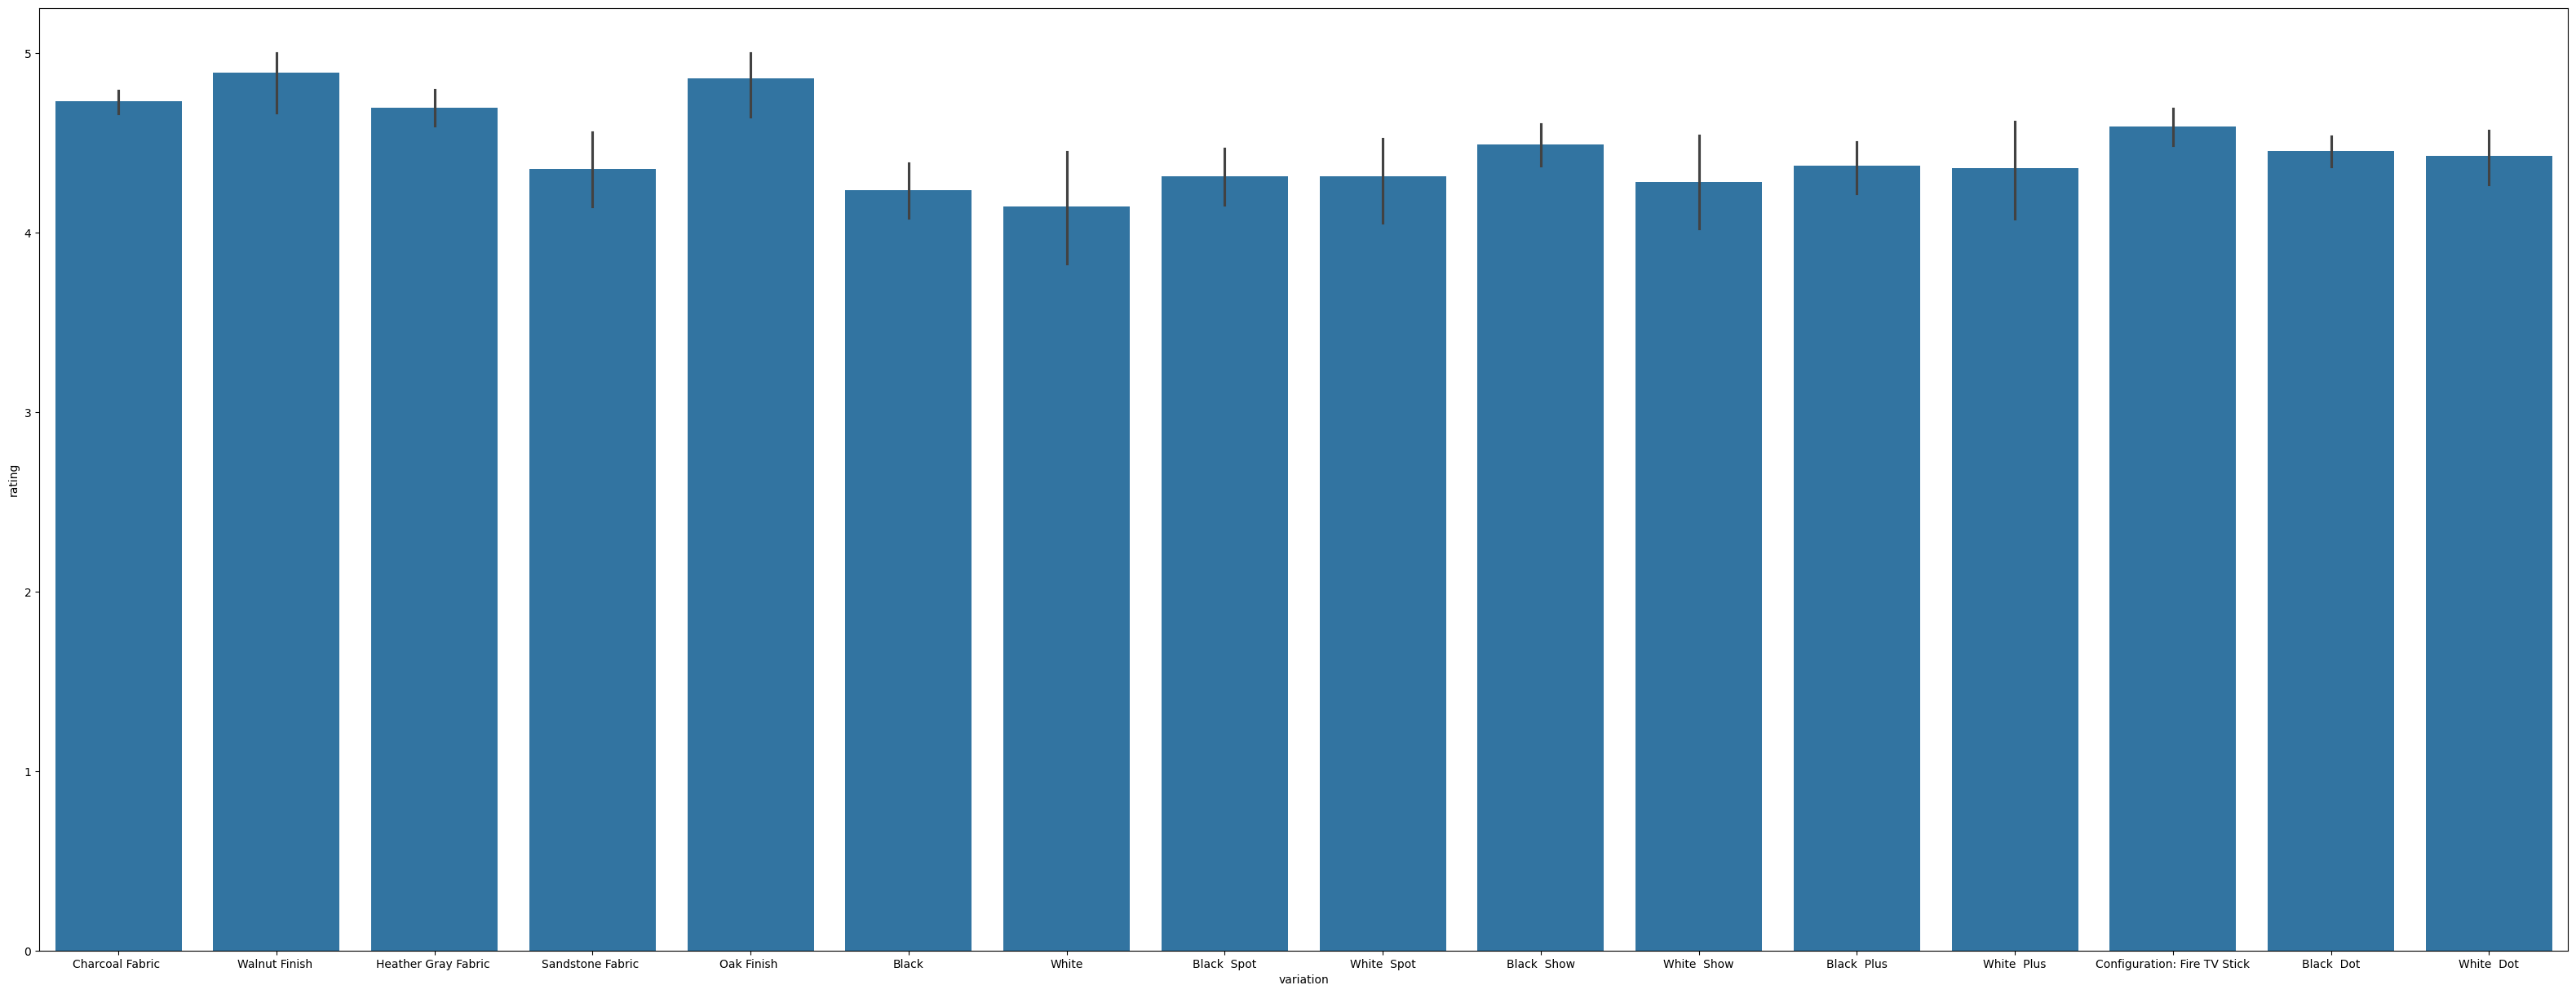

In [71]:
plt.figure(figsize=(40,15))
sns.barplot(x='variation', y='rating',data=reviews_df  )

In [81]:
sentences=reviews_df['verified_reviews'].dropna().tolist()

In [85]:
sentences_as_one=" ".join(sentences)
sentences_as_one

'Love my Echo! Loved it! Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home. I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well. Music I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do. Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet. I think this is the 5th one I\'ve purchased. I\'m working on 

In [97]:
#!pip install wordcloud
from wordcloud import WordCloud

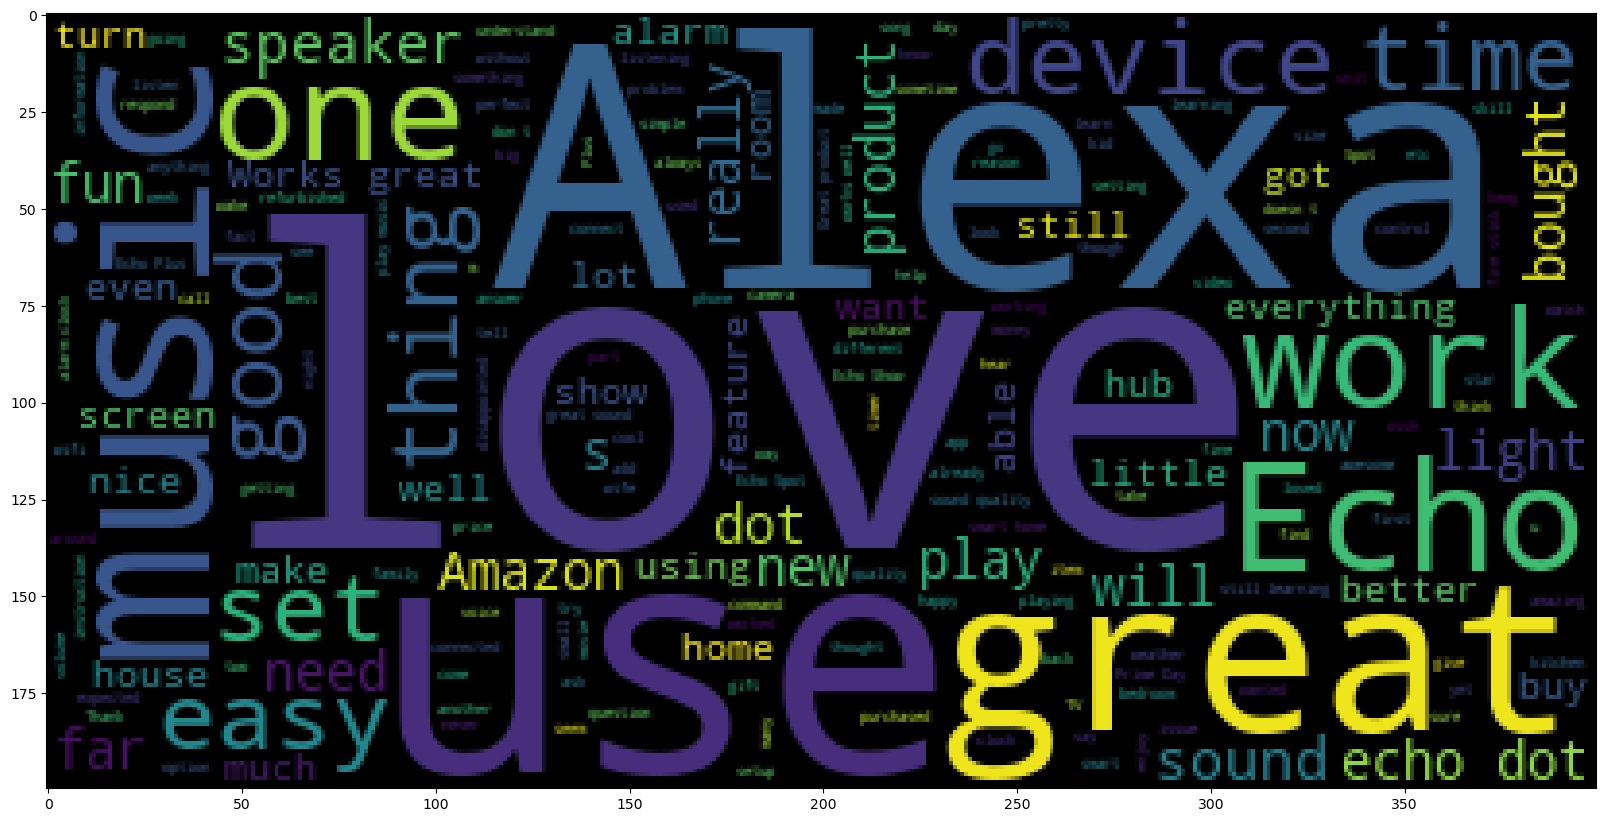

In [99]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one))

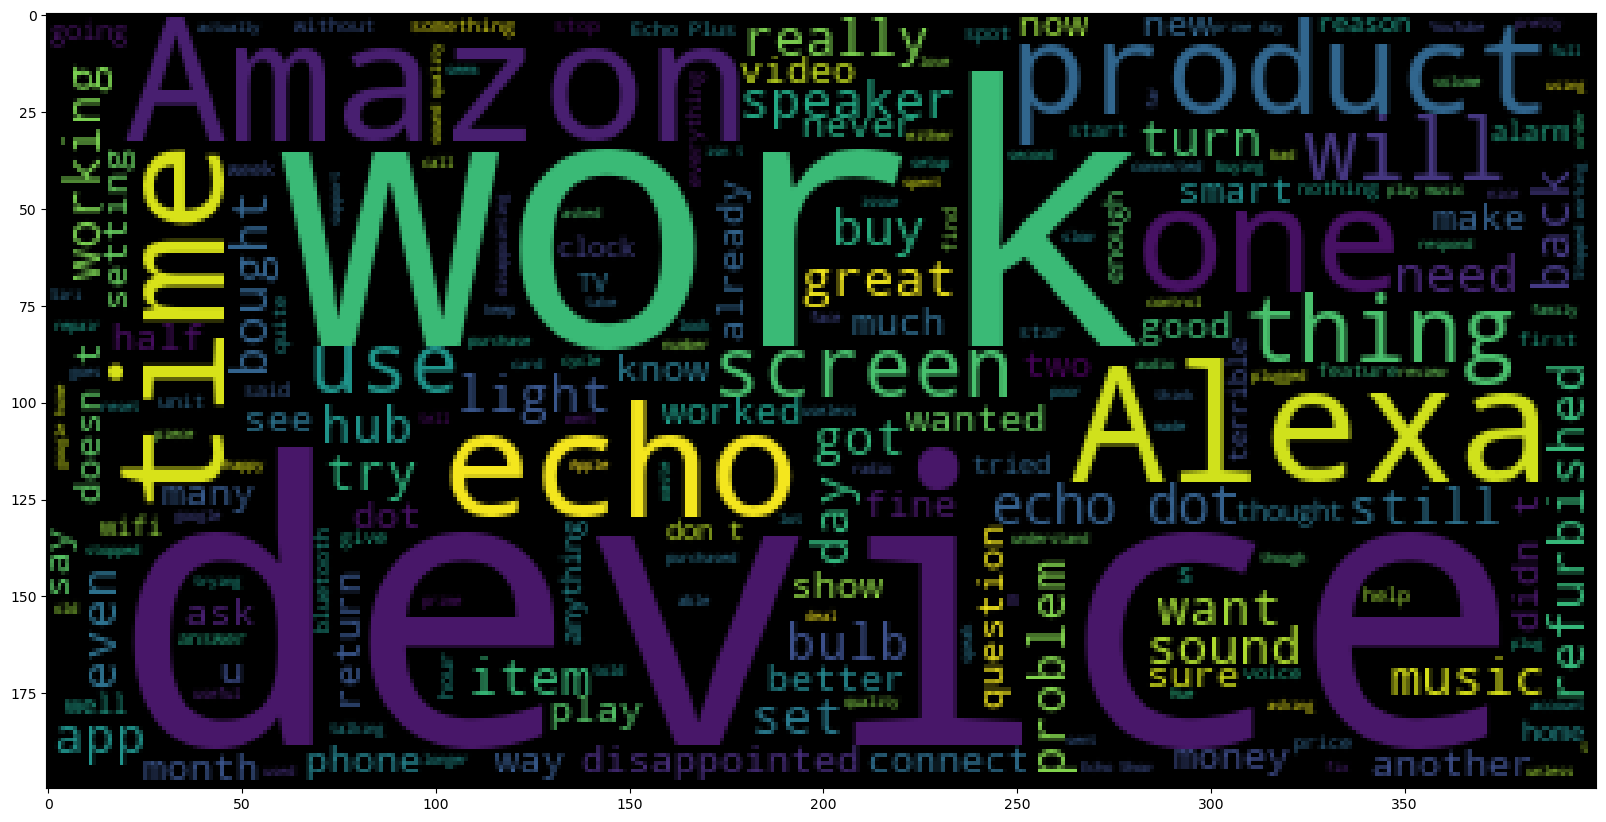

In [119]:
negative_list=negative['verified_reviews'].dropna().tolist()
negative_list
negative_sentences_as_one=" ".join(negative_list)
negative_sentences_as_one
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(negative_sentences_as_one))

In [125]:
#we gonna drop date , rating and all to make the data training ready
reviews_df


,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5
...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,135
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,441
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,380


In [127]:
reviews_df=reviews_df.drop(['date','rating', 'length'],axis=1)

In [129]:
variation_dummies=pd.get_dummies(reviews_df['variation'],drop_first=True)

In [131]:
variation_dummies

,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3146,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3147,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3148,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [133]:
reviews_df.drop(['variation'],axis=1, inplace=True)

In [135]:
reviews_df=pd.concat([reviews_df,variation_dummies],axis=1)

In [149]:
import string
string.punctuation
Test = 'Hello Mr. Future, I am so happy to be learning AI now!!'
Test_punc_removed = [char for char in Test if char not in string.punctuation]
Test_punc_removed
Test_punc_removed_join = ''.join(Test_punc_removed)
Test_punc_removed_join

'Hello Mr Future I am so happy to be learning AI now'

In [141]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [151]:
from nltk.corpus import stopwords
stopwords.words('english')
Test_punc_removed_join
Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
Test_punc_removed_join_clean
sample = 'Here is a mini challenge, that will teach you how to remove stopwords and punctuations!'
challege = [ char     for char in sample  if char not in string.punctuation ]
challenge = ''.join(challege)
challenge = [  word for word in challenge.split() if word.lower() not in stopwords.words('english')  ] 

In [155]:
from sklearn.feature_extraction.text import CountVectorizer
sample_data = ['This is the first document.','This document is the second document.','And this is the third one.','Is this the first document?']

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sample_data)
print(vectorizer.get_feature_names_out())
print(X.toarray()) 
mini_challenge = ['Hello World','Hello Hello World','Hello World world world']

vectorizer_challenge = CountVectorizer()
X_challenge = vectorizer_challenge.fit_transform(mini_challenge)
print(X_challenge.toarray())

['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']
[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]
[[1 1]
 [2 1]
 [1 3]]


In [157]:

import string
from nltk.corpus import stopwords

def message_cleaning(message):
    if isinstance(message, str):  
        # remove punctuations
        Test_punc_removed = [char for char in message if char not in string.punctuation]
        Test_punc_removed_join = ''.join(Test_punc_removed)
        # remove stopwords
        Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
        return Test_punc_removed_join_clean
    else:
        return []  


In [167]:
reviews_df_clean = reviews_df['verified_reviews'].apply(message_cleaning)


In [169]:
print(reviews_df_clean)

0                                            [Love, Echo]
1                                                 [Loved]
2       [Sometimes, playing, game, answer, question, c...
3       [lot, fun, thing, 4, yr, old, learns, dinosaur...
4                                                 [Music]
                              ...                        
3145                    [Perfect, kids, adults, everyone]
3146    [Listening, music, searching, locations, check...
3147    [love, things, running, entire, home, TV, ligh...
3148    [complaint, sound, quality, isnt, great, mostl...
3149                                               [Good]
Name: verified_reviews, Length: 3150, dtype: object


In [171]:
from sklearn.feature_extraction.text import CountVectorizer

In [173]:
vectorizer= CountVectorizer(analyzer=message_cleaning)
reviews_countvectorizer=vectorizer.fit_transform(reviews_df['verified_reviews'])

In [181]:
print(reviews_countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [185]:
reviews_countvectorizer.shape

(3150, 5211)

In [187]:
reviews_df.drop(['verified_reviews'],axis=1, inplace=True)

In [189]:
reviews_df

,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1,1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
2,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
3,1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
4,1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,1,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3146,1,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3147,1,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3148,1,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [191]:
reviews=pd.DataFrame(reviews_countvectorizer.toarray())

In [197]:
reviews_df= pd.concat([reviews_df, reviews],axis=1)

In [199]:
x=reviews_df.drop(['feedback'],axis=1)
y=reviews_df['feedback']

In [207]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.2)

In [231]:
from sklearn.naive_bayes import MultinomialNB
x_train.columns = x_train.columns.astype(str)
x_test.columns = x_test.columns.astype(str)

In [233]:
NB_classifier=MultinomialNB()
NB_classifier.fit(x_train,y_train)

MultinomialNB()

In [235]:
from sklearn.metrics import classification_report, confusion_matrix

In [237]:
y_predict_train=NB_classifier.predict(x_train)

In [239]:
y_predict_train

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

<Axes: >

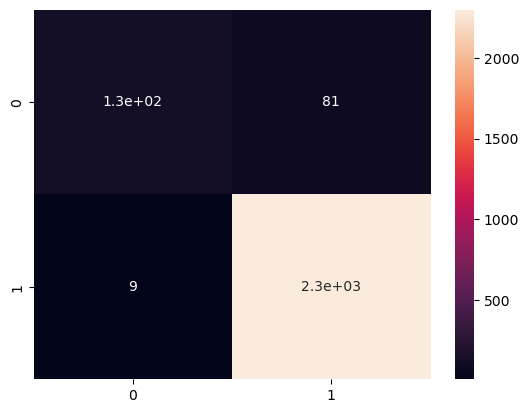

In [241]:
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm,annot=True)

<Axes: >

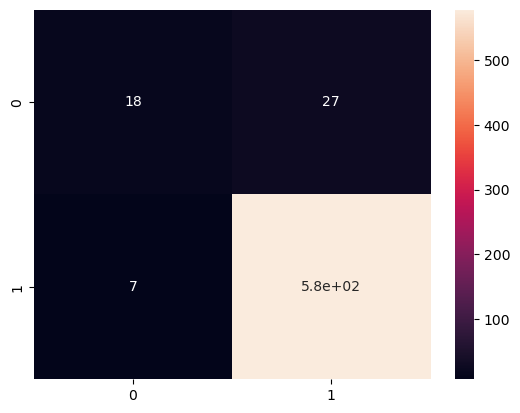

In [251]:
y_predict_test=NB_classifier.predict(x_test)
cm2= confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm2,annot=True)

In [253]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.72      0.40      0.51        45
           1       0.96      0.99      0.97       585

    accuracy                           0.95       630
   macro avg       0.84      0.69      0.74       630
weighted avg       0.94      0.95      0.94       630



In [255]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [257]:
y_pred=model.predict(x_test)

In [259]:
print('accuracy:{}%'.format(100*accuracy_score(y_pred, y_test)))

accuracy:94.6031746031746%


<Axes: >

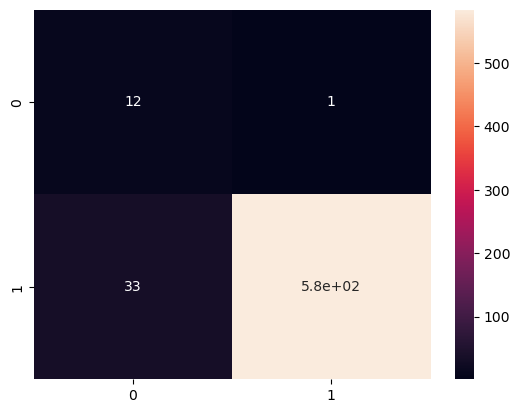

In [261]:
cm=confusion_matrix(y_pred,y_test)
sns.heatmap(cm,annot=True)

In [271]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.27      0.41        45
           1       0.95      1.00      0.97       585

    accuracy                           0.95       630
   macro avg       0.93      0.63      0.69       630
weighted avg       0.94      0.95      0.93       630

